# 🖼️ Project Introduction: CNN Image Resolution Enhancer

Welcome to my experimental project, where I explore the capabilities of Convolutional Neural Networks (CNNs) in enhancing image resolution using Keras. In this notebook, I delve into the innovative use of convolutional transpose layers to upscale and enhance images, pushing the boundaries of what's possible with current image processing technologies.

The goal is to experimentally verify the effectiveness of convolutional transpose layers in image upscaling. By leveraging these layers, I aim to reconstruct higher-resolution images from their lower-resolution counterparts, enhancing detail and clarity.

This project is designed as a practical exploration into advanced image processing techniques. Whether you're a student, a researcher, or a tech enthusiast, this notebook will provide you with a hands-on experience in using CNNs for image enhancement. Let's embark on this journey to see how far I can enhance image quality through deep learning!


## Mounting Google Drive

The following Python code snippet is used to mount Google Drive in a Google Colab environment. This is essential when you need to access files from your Google Drive directly within your Colab notebook.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


This Python code imports the Keras library and utilizes its functionality to create a dataset of images from a specified directory. The `image_dataset_from_directory` function is particularly useful for loading images directly from a folder structure, ideal for training or evaluating machine learning models that process images.

- The path specified (`'/content/drive/MyDrive/Colab Notebooks/Data/HR'`) directs to the directory containing high-resolution images.
- `labels=None` indicates that the dataset does not include labels, making it suitable for applications where image labeling is not required.
- `image_size` is set to `(512, 512)`, meaning each image will be resized to these dimensions.
- `pad_to_aspect_ratio=True` maintains the original aspect ratio of images, adding padding as necessary, which is important for certain types of image analysis.
- `interpolation='bilinear'` is chosen for resizing, a method that provides a good balance between computational efficiency and image quality.


This configuration is particularly suited for tasks that require handling high-resolution image data efficiently within a Google Colab environment, leveraging direct access to files stored on Google Drive.


In [ ]:
import keras
image_size= (512,512)
Y_ds = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Data/HR',
    batch_size=None,
    labels=None,

    color_mode='rgb',
    image_size=image_size,
    pad_to_aspect_ratio=True,
    interpolation='bilinear',

    shuffle=False
)

Found 900 files.


This snippet modifies the `image_size` for the dataset generation to `(256, 256)`, resizing each image to these new dimensions:

- `image_size` is now set to `(256, 256)`, a change from the previous configuration, adjusting the size to potentially enhance processing efficiency or meet specific model requirements.


In [ ]:
image_size= (256,256)
X_ds = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Data/HR',
    batch_size=None,
    labels=None,

    color_mode='rgb',
    image_size=image_size,
    pad_to_aspect_ratio=True,
    interpolation='bilinear',

    shuffle=False
)

Found 900 files.


This code defines a function `scale` that normalizes image pixel values by dividing each by 255, converting them into a range from 0 to 1. This normalization is a common preprocessing step in image processing tasks to help improve model performance by maintaining numerical stability.

- The `scale` function takes an image as input and returns the normalized image.
- The function is then applied to both `X_ds` and `Y_ds` datasets using the `.map()` method, ensuring that all images in these datasets are properly scaled for subsequent processing steps.


In [ ]:
def scale(image):
    return image / 255

X_ds = X_ds.map(scale)
Y_ds = Y_ds.map(scale)

In [ ]:
import tensorflow as tf
dataset = tf.data.Dataset.zip(X_ds,Y_ds)

In [ ]:
batch_size = 11
num_train_images = int(len(dataset) * 0.8)
train_ds = dataset.take(num_train_images).shuffle(num_train_images).batch(batch_size)
val_ds = dataset.skip(num_train_images).batch(batch_size)


In [ ]:
from PIL import Image


for Y_ds, X_ds in dataset.take(1):
     image = Image.fromarray((X_ds.numpy()).astype('uint8'))
     image.show()
     image = Image.fromarray((Y_ds.numpy()).astype('uint8'))
     image.show()




This script initializes a convolutional neural network (CNN) for image processing using Keras. The model architecture is defined using a custom function `Innerlayers`, which constructs layers of convolutions, batch normalization, and ReLU activations.

- **Session Clearing**: `keras.utils.clear_session()` is called to ensure a clean environment.
- **Input Definition**: The input shape is specified as `(256, 256, 3)`, suitable for RGB images.
- **Layer Construction**: `Innerlayers` is a function that builds layers with a skip connection pattern using both direct convolution and convolution transpose layers for potential upscaling.
- **Model Assembly**: The layers are sequentially connected, starting from the input, through multiple `Innerlayers`, and concluding with a final convolution that uses a sigmoid activation to format the output as image data between 0 and 1.

The model's structure, including parameters and configurations, is summarized at the end to provide an overview of the network's complexity and design.


In [ ]:
import keras.layers as L

keras.utils.clear_session()

image_shape = (256, 256, 3)
def Innerlayers(loops, x, filter=32, strides='none'):
    first_layer = None
    for i in range(loops):
        x = L.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
        x = L.BatchNormalization()(x)
        x = L.Activation('relu')(x)
        if i == 0:
          first_layer = x
    x = keras.layers.Add()([first_layer, x])
    x = L.Conv2DTranspose(filters=filter, kernel_size=3, padding="same", strides=strides, activation='relu')(x)
    first_layer = None
    for i in range(loops):
        x = L.Conv2D(filters=filter, kernel_size=3, padding="same")(x)
        x = L.BatchNormalization()(x)
        x = L.Activation('relu')(x)
        if i == 0:
          first_layer = x
    x = keras.layers.Add()([first_layer, x])
    return x

## the layers has been redused duo to the resources

x = input = L.Input(shape=image_shape)

x = l1 = Innerlayers(loops=5, x=x, strides=2)
#x = l2 = Innerlayers(loops=5,filter=64, x=x, strides=2)
#x = l3 = Innerlayers(loops=2,filter=128, x=x, strides=2)


#x = L.Conv2D(filters=256,kernel_size = 3, padding="same", strides=2, activation='relu')(x)


x = L.Conv2D(filters=3, kernel_size=3, padding='same', activation='sigmoid')(x)


model = keras.models.Model(inputs=input, outputs=x)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 256, 256, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 256, 256, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 256, 256, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 256, 256, 32)   │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 256, 256, 32)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 256, 256, 32)   │            128 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 256, 256, 32)   │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 256, 256, 32)   │          9,248 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 256, 256, 32)   │            128 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activation) │ (None, 256, 256, 32)   │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 256, 256, 32)   │              0 │ activation[0][0],      │
│                      

 Total params: 95,523 (373.14 KB)

 Trainable params: 94,883 (370.64 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=["mse"],
    )

This code snippet handles the training process of the CNN model:

- **Dataset**: The model is trained using `train_ds` and validated with `val_ds`.
- **Epochs**: Training is set for up to 1000 epochs, allowing the model substantial time to learn from the data.
- **Callbacks**:
  - `EarlyStopping`: Monitors the validation loss and stops training if there isn't any improvement after 10 epochs, restoring weights from the best epoch.
  - `ReduceLROnPlateau`: Reduces the learning rate by a factor of 0.1 if there's no improvement in validation loss after 5 epochs, aiding in fine-tuning the model's performance.

This setup is designed to optimize the training process, preventing overfitting and ensuring efficient learning.


In [ ]:
log = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=1000,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.1),
    ],
)

Epoch 1/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 95s 602ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0596 - val_mse: 0.0596 - learning_rate: 0.0010
Epoch 2/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 397ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0444 - val_mse: 0.0444 - learning_rate: 0.0010
Epoch 3/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 392ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0360 - val_mse: 0.0360 - learning_rate: 0.0010
Epoch 4/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 390ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0284 - val_mse: 0.0284 - learning_rate: 0.0010
Epoch 5/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 391ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0156 - val_mse: 0.0156 - learning_rate: 0.0010
Epoch 6/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 392ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0094 - val_mse: 0.0094 - learning_rate: 0.0010
Epoch 7/1000
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 391ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0072 - val_mse: 0.0072 - learnin

In [ ]:
model.save('enh_model.keras')

This script evaluates the model's predictions on validation data and visualizes the results:

- **Image Resizing**: Ground truth images are resized to match the prediction dimensions with anti-aliasing to maintain quality.
- **Visualization**: The input image, model prediction, and resized ground truth are displayed side by side for a visual comparison of the model's performance.


Input shape: (11, 256, 256, 3)
Ground truth shape: (11, 512, 512, 3)
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step
Predicted shape: (180, 512, 512, 3)
Resized ground truth shape: (11, 512, 512, 3)


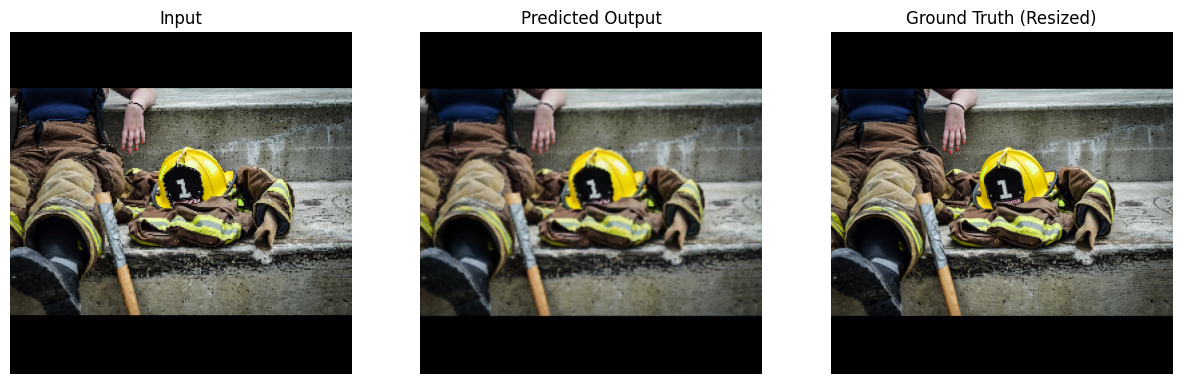

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import resize

for X_val, y_val in val_ds.take(1):
    print("Input shape:", X_val.shape)
    print("Ground truth shape:", y_val.shape)

pred = model.predict(val_ds)
print("Predicted shape:", pred.shape)

import numpy as np
preds = (pred[0] * 255).astype(np.uint8)

ground_truth_resized = []
for i in range(len(y_val)):
    resized = resize(y_val[i], preds.shape[:2], anti_aliasing=True)
    ground_truth_resized.append((resized * 255).astype(np.uint8))
ground_truth_resized = np.array(ground_truth_resized)

print("Resized ground truth shape:", ground_truth_resized.shape)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(X_val[0])
axes[0].axis('off')
axes[0].set_title('Input')
axes[1].imshow(preds)
axes[1].axis('off')
axes[1].set_title('Predicted Output')
axes[2].imshow(ground_truth_resized[0])
axes[2].axis('off')
axes[2].set_title('Ground Truth (Resized)')
plt.show()

## Conclusion

The experiment with the convolutional neural network (CNN) for image resolution enhancement using Keras did not meet the expected outcomes. Despite the theoretical potential of using convolutional transpose layers for upscaling images, the results were not as effective as those obtained from more advanced models such as diffusion models or Generative Adversarial Networks (GANs).

It was observed that this approach, while innovative, is significantly resource-intensive. The computational cost and the amount of data required to train the model effectively make it less feasible compared to other state-of-the-art techniques. Models based on diffusion processes or GANs have shown superior performance in terms of both image quality and detail enhancement, making them more suitable for high-fidelity image upscaling tasks.

Moving forward, it would be advisable to explore these more efficient models that not only yield better visual results but also optimize the use of computational resources.
